In [56]:
import camelot
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
import urllib, json


#
#from IPython.display import Image
import eleanor
import numpy as np
import matplotlib.pyplot as plt
from lightkurve.lightcurve import LightCurve as LC
from lightkurve import TessTargetPixelFile


# bokeh basics
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
output_notebook()

Loading BokehJS ...

In [41]:
tables = camelot.read_pdf('LISATelecon_copy.pdf',pages='2', flavor='stream',strip_text='\x04',row_tol=5)

In [42]:
tables[0].df

,0,1,2,3,4,5
0,# Name,Alternative name,RA/Dec,Period (min),Magnitude,References\nComments
1,HM Cnc,RX J0806.3+1527,08:06:22.84 +15:27:31.5,5.4,21.1,Roelofs et al. (2010)
2,V407 Vul,RX J1914.4+2456,19:14:26.09 +24:56:44.6,9.5,>19.7,Steeghs et al. (2006)
3,ES Cet,KUV 01584-0939,02:00:52.17 -09:24:31.7,10.3,17.1,Espaillat et al. (2005)
4,AM CVn,HZ 29,12:34:54.60 +37:37:44.1,17.1,14.02,Roelofs et al. (2006)
5,SDSSJ1908+3940,KIC004547333,19:08:17.07 +39:40:36.4,18.2,16.1g,Kupfer et al. (2015)
6,HP Lib,EC 15330-1403,15:35:53.08 -14:13:12.2,18.4,13.59 (falls in K2 15),Roelofs et al. (2007)
7,PTF1J1919+4815,PTFS1119aq,19:19:05.19 +48:15:06.2,22.5,20.16g,Levitan et al (2014)\nEclipsing (hot spot)
8,CR Boo,PG 1346+082,13:48:55.22 +07:57:35.8,24.5,14.5,"Patterson et al. (1997), Kato et al. (200)"
9,KL Dra,SN1998di,19:24:38.28 +59:41:46.7,25.0,16.8-20,Wood et al. (2002)


In [43]:
names = [i[0] for i in tables[0].data[3:-3] ]
coord = [i[2].split() for i in tables[0].data[3:-3] if i[0] != '']
coordastropy = [ SkyCoord(i[0],i[1], unit=(u.hourangle, u.deg))for i in coord]
radeg = [ i.ra.deg for i in coordastropy]
decdeg = [ i.dec.deg for i in coordastropy]
urllist = []

In [44]:
for r,d in zip(radeg,decdeg):
    url = "https://mast.stsci.edu/tesscut/api/v0.1/sector?ra={ra}&dec={dec}&y=15&x=10&units=px&sector=All".format(ra=r,dec=d)
    urllist.append(url)
    print(url)

https://mast.stsci.edu/tesscut/api/v0.1/sector?ra=30.217374999999997&dec=-9.408805555555556&y=15&x=10&units=px&sector=All
https://mast.stsci.edu/tesscut/api/v0.1/sector?ra=188.7275&dec=37.62891666666667&y=15&x=10&units=px&sector=All
https://mast.stsci.edu/tesscut/api/v0.1/sector?ra=287.071125&dec=39.67677777777777&y=15&x=10&units=px&sector=All
https://mast.stsci.edu/tesscut/api/v0.1/sector?ra=233.97116666666665&dec=-14.220055555555556&y=15&x=10&units=px&sector=All
https://mast.stsci.edu/tesscut/api/v0.1/sector?ra=289.771625&dec=48.25172222222222&y=15&x=10&units=px&sector=All
https://mast.stsci.edu/tesscut/api/v0.1/sector?ra=207.23008333333334&dec=7.959944444444445&y=15&x=10&units=px&sector=All
https://mast.stsci.edu/tesscut/api/v0.1/sector?ra=291.1595&dec=59.696305555555554&y=15&x=10&units=px&sector=All
https://mast.stsci.edu/tesscut/api/v0.1/sector?ra=200.9355833333333&dec=-41.741527777777776&y=15&x=10&units=px&sector=All
https://mast.stsci.edu/tesscut/api/v0.1/sector?ra=109.800541666

In [45]:
responsedic = {}
for name,url,rad,decd in zip(names,urllist,radeg,decdeg):
    response = urllib.request.urlopen(url)
    data = json.loads(response.read())
    print(name,rad,decd,data,len(data['results']))
    subdic = {}
    subdic['ra'] = rad
    subdic['dec'] = decd
    subdic['results'] = data
    subdic['resultsleng'] = len(data['results'])
    if len(data['results']) > 0:
        sectors = []
        for i in data['results']:
            sectors.append(int(i['sector']))
            subdic['sectors'] = sectors
    else:
        sectors = []
    print(sectors)
   
    responsedic[name] = subdic
   


ES Cet 30.217374999999997 -9.408805555555556 {'results': []} 0
[]
AM CVn 188.7275 37.62891666666667 {'results': []} 0
[]
SDSSJ1908+3940 287.071125 39.67677777777777 {'results': [{'sectorName': 'tess-s0014-2-3', 'sector': '0014', 'camera': '2', 'ccd': '3'}]} 1
[14]
HP Lib 233.97116666666665 -14.220055555555556 {'results': []} 0
[]
PTF1J1919+4815 289.771625 48.25172222222222 {'results': [{'sectorName': 'tess-s0014-2-4', 'sector': '0014', 'camera': '2', 'ccd': '4'}, {'sectorName': 'tess-s0015-2-3', 'sector': '0015', 'camera': '2', 'ccd': '3'}]} 2
[14, 15]
CR Boo 207.23008333333334 7.959944444444445 {'results': []} 0
[]
KL Dra 291.1595 59.696305555555554 {'results': [{'sectorName': 'tess-s0014-2-1', 'sector': '0014', 'camera': '2', 'ccd': '1'}, {'sectorName': 'tess-s0015-2-2', 'sector': '0015', 'camera': '2', 'ccd': '2'}, {'sectorName': 'tess-s0016-2-2', 'sector': '0016', 'camera': '2', 'ccd': '2'}, {'sectorName': 'tess-s0017-4-1', 'sector': '0017', 'camera': '4', 'ccd': '1'}]} 4
[14, 15, 

In [46]:
responsedic['KL Dra']

{'ra': 291.1595,
 'dec': 59.696305555555554,
 'results': {'results': [{'sectorName': 'tess-s0014-2-1',
    'sector': '0014',
    'camera': '2',
    'ccd': '1'},
   {'sectorName': 'tess-s0015-2-2',
    'sector': '0015',
    'camera': '2',
    'ccd': '2'},
   {'sectorName': 'tess-s0016-2-2',
    'sector': '0016',
    'camera': '2',
    'ccd': '2'},
   {'sectorName': 'tess-s0017-4-1',
    'sector': '0017',
    'camera': '4',
    'ccd': '1'}]},
 'resultsleng': 4,
 'sectors': [14, 15, 16, 17]}

In [47]:
responsedic['KL Dra']['sectors']

[14, 15, 16, 17]

In [74]:
star = eleanor.Source(coords=(responsedic['KL Dra']['ra'] , responsedic['KL Dra']['dec']), sector=responsedic['KL Dra']['sectors'][2], tc=True)

/home/mmarcano/anaconda3/envs/ele/lib/python3.7/site-packages/eleanor/targetdata.py:383: UserWarning: WARNING: Making a TPF smaller than (9,9) may provide inadequate results.
  warnings.warn('WARNING: Making a TPF smaller than (9,9) may provide inadequate results.')
/home/mmarcano/anaconda3/envs/ele/lib/python3.7/site-packages/eleanor/targetdata.py:393: UserWarning: WARNING: Making a TPF smaller than (9,9) may provide inadequate results.
  warnings.warn('WARNING: Making a TPF smaller than (9,9) may provide inadequate results.')


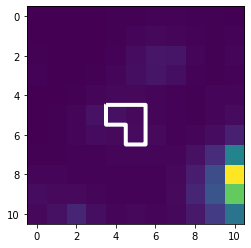

In [75]:
data = eleanor.TargetData(star,height=11, width=11)
vis = eleanor.Visualize(data)
vis.aperture_contour()

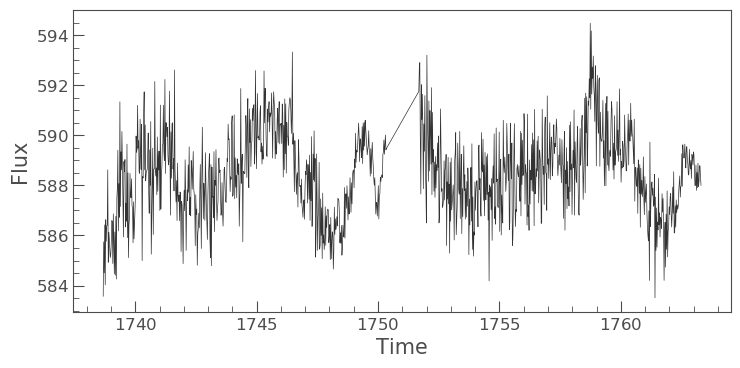

In [76]:
q = data.quality == 0
lk = LC(data.time[q], data.corr_flux[q]).plot()

In [ ]:
# Create a blank figure with labels
p = figure(plot_width = 900, plot_height = 600, 
           title = 'Example Glyphs',
x_axis_label = 'X', y_axis_label = 'Y')

p.line(data.time[q],data.corr_flux[q])
show(p)

# Erase

In [30]:
ii = 5
responsedic = {}
for name,url,rad,decd in zip(names[0:ii],urllist[0:ii],radeg[0:ii],decdeg[0:ii]):
    response = urllib.request.urlopen(url)
    data = json.loads(response.read())
    print(name,rad,decd,data,len(data['results']))
    subdic = {}
    subdic['ra'] = rad
    subdic['dec'] = decd
    subdic['results'] = data
    subdic['resultsleng'] = len(data['results'])
    if len(data['results']) > 0:
        sectors = []
        for i in data['results']:
            sectors.append(int(i['sector']))
        print(sectors)
    responsedic[name] = subdic
   


ES Cet 30.217374999999997 -9.408805555555556 {'results': []} 0
AM CVn 188.7275 37.62891666666667 {'results': []} 0
SDSSJ1908+3940 287.071125 39.67677777777777 {'results': [{'sectorName': 'tess-s0014-2-3', 'sector': '0014', 'camera': '2', 'ccd': '3'}]} 1
[14]
HP Lib 233.97116666666665 -14.220055555555556 {'results': []} 0
PTF1J1919+4815 289.771625 48.25172222222222 {'results': [{'sectorName': 'tess-s0014-2-4', 'sector': '0014', 'camera': '2', 'ccd': '4'}, {'sectorName': 'tess-s0015-2-3', 'sector': '0015', 'camera': '2', 'ccd': '3'}]} 2
[14, 15]


In [71]:
for items in responsedic.items():
    print(items[])


[30.217374999999997, -9.408805555555556, {'results': []}]
[188.7275, 37.62891666666667, {'results': []}]
[287.071125, 39.67677777777777, {'results': [{'sectorName': 'tess-s0014-2-3', 'sector': '0014', 'camera': '2', 'ccd': '3'}]}]
[233.97116666666665, -14.220055555555556, {'results': []}]


In [100]:
responsedic['SDSSJ1908+3940']['sectors']

[14]

In [92]:
for i in data['results']:
    print(i)

{'sectorName': 'tess-s0014-2-4', 'sector': '0014', 'camera': '2', 'ccd': '4'}
{'sectorName': 'tess-s0015-2-3', 'sector': '0015', 'camera': '2', 'ccd': '3'}
